
### **Iris Flower Classification**

1. **Load Dataset**

   • Load the Iris dataset using seaborn or scikit-learn.

2. **Preprocess the Data**

   • Check for and handle missing values (if any).

   • Encode target labels using LabelEncoder or one-hot encoding.

   • Normalize feature values using MinMaxScaler.

3. **EDA**

   • Plot petal length vs petal width colored by species.

   • Provide one insight (e.g., which species has the largest petal size).

4. **Model Training**

    • Use a decision tree classifier.

    • Apply vectorized operations only.

    • Train/test split (75/25).
    
    • Print model accuracy and confusion matrix.

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


df=sns.load_dataset('iris')

df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
df['species'].drop_duplicates()

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object

In [4]:
df=pd.get_dummies(df,columns=['species'],prefix='spec',drop_first=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,spec_versicolor,spec_virginica
0,5.1,3.5,1.4,0.2,False,False
1,4.9,3.0,1.4,0.2,False,False
2,4.7,3.2,1.3,0.2,False,False
3,4.6,3.1,1.5,0.2,False,False
4,5.0,3.6,1.4,0.2,False,False


In [5]:
scale=MinMaxScaler()
num_cols=['sepal_length','sepal_width','petal_length','petal_width']
df[num_cols]=scale.fit_transform(df[num_cols])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,spec_versicolor,spec_virginica
0,0.222222,0.625000,0.067797,0.041667,False,False
1,0.166667,0.416667,0.067797,0.041667,False,False
2,0.111111,0.500000,0.050847,0.041667,False,False
3,0.083333,0.458333,0.084746,0.041667,False,False
4,0.194444,0.666667,0.067797,0.041667,False,False


<Axes: xlabel='petal_length', ylabel='petal_width'>

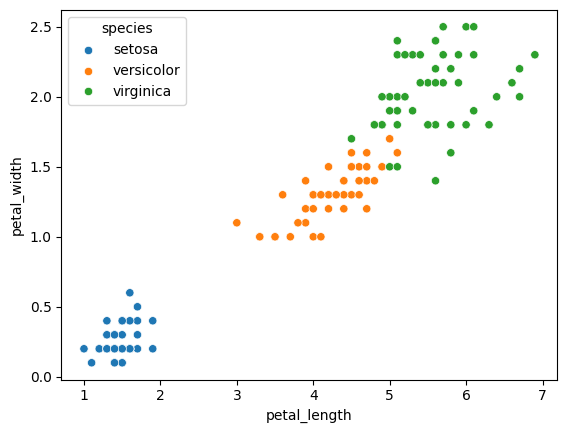

In [6]:
new_df=sns.load_dataset('iris')
sns.scatterplot(data=new_df,x='petal_length',y='petal_width',hue='species')

In [7]:
largest_petal_size=new_df.groupby('species')[['petal_length','petal_width']].mean()
print(largest_petal_size)

            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


<Axes: xlabel='species', ylabel='petal_area'>

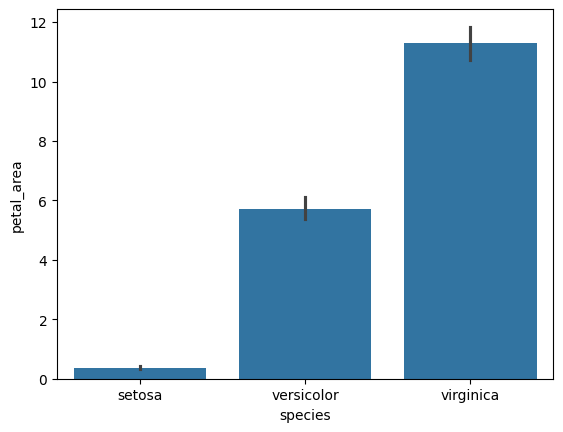

In [8]:
new_df['petal_area']=new_df['petal_length']*new_df['petal_width']

sns.barplot(data=new_df,x='species',y='petal_area',estimator='mean')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,spec_versicolor,spec_virginica
0,0.222222,0.625000,0.067797,0.041667,False,False
1,0.166667,0.416667,0.067797,0.041667,False,False
2,0.111111,0.500000,0.050847,0.041667,False,False
3,0.083333,0.458333,0.084746,0.041667,False,False
4,0.194444,0.666667,0.067797,0.041667,False,False


In [10]:
X=new_df.drop('species',axis=1)
y=new_df['species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=11)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

conf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",conf_matrix)




Accuracy:  0.9210526315789473
confusion matrix: 
 [[12  0  0]
 [ 0 10  1]
 [ 0  2 13]]
